<a href="https://colab.research.google.com/github/springboardmentor2468a-lab/Projects_2/blob/Humera/WEEK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# TASK 1: Import necessary libraries


import io
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

plt.rcParams['figure.figsize'] = (10, 5)
sns.set(style="whitegrid")


In [2]:
# TASK 2: Upload and load hour.csv and day.csv

print("Upload hour dataset (e.g., hour.csv):")
uploaded = files.upload()
hour_fname = next(iter(uploaded))
# try csv, fallback to excel
if hour_fname.lower().endswith('.csv'):
    hour_df = pd.read_csv(io.BytesIO(uploaded[hour_fname]))
else:
    hour_df = pd.read_excel(io.BytesIO(uploaded[hour_fname]))
print("Loaded", hour_fname, "shape:", hour_df.shape)

print("\nUpload day dataset (e.g., day.csv):")
uploaded = files.upload()
day_fname = next(iter(uploaded))
if day_fname.lower().endswith('.csv'):
    day_df = pd.read_csv(io.BytesIO(uploaded[day_fname]))
else:
    day_df = pd.read_excel(io.BytesIO(uploaded[day_fname]))
print("Loaded", day_fname, "shape:", day_df.shape)

# Quick peek
display(Markdown("### Hour dataset head"))
display(hour_df.head())
display(Markdown("### Day dataset head"))
display(day_df.head())


Upload hour dataset (e.g., hour.csv):


Saving hour.csv to hour.csv
Loaded hour.csv shape: (17379, 17)

Upload day dataset (e.g., day.csv):


Saving day.csv to day.csv
Loaded day.csv shape: (731, 16)


### Hour dataset head

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Day dataset head

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# TASK 3: Basic cleaning + type fixes for both datasets

def basic_clean(df, name="df"):
    df = df.copy()
    # Normalize column names
    df.columns = [c.strip() for c in df.columns.astype(str)]
    print(f"\n{name} shape: {df.shape}")
    print("Nulls per column:")
    print(df.isnull().sum())
    print("Duplicate rows:", df.duplicated().sum())
    # Try parse dteday if present
    if 'dteday' in df.columns:
        df['dteday'] = pd.to_datetime(df['dteday'], errors='coerce')
        print(f"Parsed 'dteday' in {name}. Nulls after parse:", df['dteday'].isnull().sum())
    return df

hour_df = basic_clean(hour_df, name="hour_df")
day_df  = basic_clean(day_df,  name="day_df")

# Some columns (weekday, workingday, holiday) sometimes parse to datetime accidentally.
# Convert them back to integer if they appear as datetime but actually are categorical/numeric.
def fix_date_like_columns(df, cols):
    for c in cols:
        if c in df.columns:
            if np.issubdtype(df[c].dtype, np.datetime64):
                # convert datetime64 to integer codes (days since epoch) - more likely original was int
                try:
                    df[c] = df[c].dt.day.astype('Int64')  # keep small int (day part) as a fallback
                except Exception:
                    df[c] = df[c].astype('Int64', errors='ignore')
    return df

# Columns to check (common ones in your data)
check_cols = ['weekday', 'workingday', 'holiday']
hour_df = fix_date_like_columns(hour_df, check_cols)
day_df  = fix_date_like_columns(day_df,  check_cols)

# Ensure numeric columns are correct dtype (optional; safe conversion)
for df, name in [(hour_df, 'hour_df'), (day_df, 'day_df')]:
    for c in df.columns:
        if df[c].dtype == object and df[c].dropna().apply(lambda x: isinstance(x, (int,float)) or str(x).replace('.','',1).isdigit()).all():
            # convert object numeric-like to numeric
            df[c] = pd.to_numeric(df[c], errors='ignore')
    # reassign back
    if name == 'hour_df':
        hour_df = df
    else:
        day_df = df

print("\nFinal dtypes sample (hour_df):")
display(hour_df.dtypes.head(20))
print("\nFinal dtypes sample (day_df):")
display(day_df.dtypes.head(20))



hour_df shape: (17379, 17)
Nulls per column:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Duplicate rows: 0
Parsed 'dteday' in hour_df. Nulls after parse: 0

day_df shape: (731, 16)
Nulls per column:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Duplicate rows: 0
Parsed 'dteday' in day_df. Nulls after parse: 0

Final dtypes sample (hour_df):


,0
instant,int64
dteday,datetime64[ns]
season,int64
yr,int64
mnth,int64
hr,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64



Final dtypes sample (day_df):


,0
instant,int64
dteday,datetime64[ns]
season,int64
yr,int64
mnth,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64
temp,float64


In [4]:
# TASK 4: LEFT merge on 'dteday' to attach day-level attributes to each hour

# Ensure 'dteday' present and datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'], errors='coerce')
day_df['dteday']  = pd.to_datetime(day_df['dteday'],  errors='coerce')

# Select day-level columns to attach (exclude instant and dteday)
day_cols = [c for c in day_df.columns if c not in ('instant','dteday')]

merged = hour_df.merge(
    day_df[['dteday'] + day_cols],
    on='dteday',
    how='left',
    suffixes=('_hour','_day')
)

print("hour_df shape:", hour_df.shape)
print("day_df shape:", day_df.shape)
print("merged shape (should equal hour_df rows):", merged.shape)
display(merged.head())


hour_df shape: (17379, 17)
day_df shape: (731, 16)
merged shape (should equal hour_df rows): (17379, 31)


,instant,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


Running simple EDA...

📌 Summary statistics:


,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.000000,4345.500000,8690.000000,13034.500000,17379.000000
season_hour,17379.0,2.501640,1.106918,1.000000,2.000000,3.000000,3.000000,4.000000
yr_hour,17379.0,0.502561,0.500008,0.000000,0.000000,1.000000,1.000000,1.000000
mnth_hour,17379.0,6.537775,3.438776,1.000000,4.000000,7.000000,10.000000,12.000000
hr,17379.0,11.546752,6.914405,0.000000,6.000000,12.000000,18.000000,23.000000
holiday_hour,17379.0,0.028770,0.167165,0.000000,0.000000,0.000000,0.000000,1.000000
weekday_hour,17379.0,3.003683,2.005771,0.000000,1.000000,3.000000,5.000000,6.000000
workingday_hour,17379.0,0.682721,0.465431,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit_hour,17379.0,1.425283,0.639357,1.000000,1.000000,1.000000,2.000000,4.000000
temp_hour,17379.0,0.496987,0.192556,0.020000,0.340000,0.500000,0.660000,1.000000


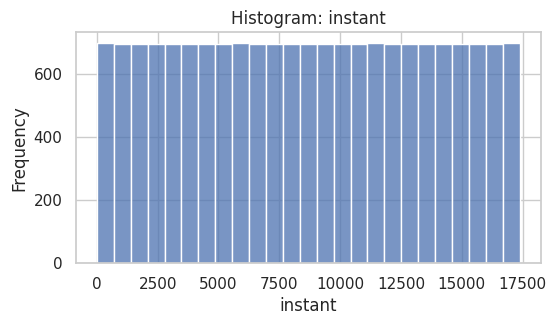

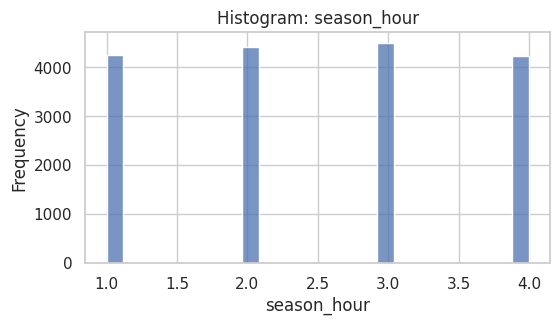

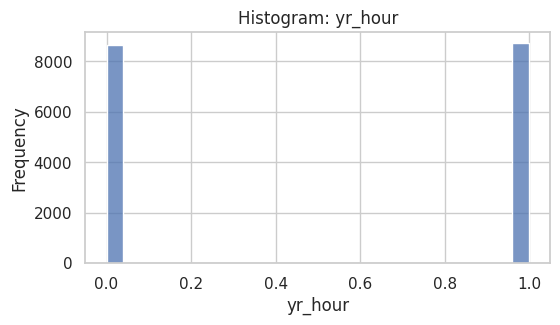

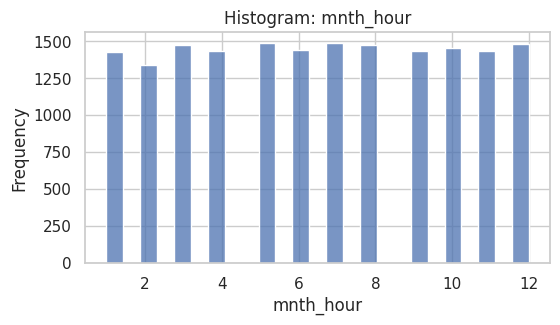

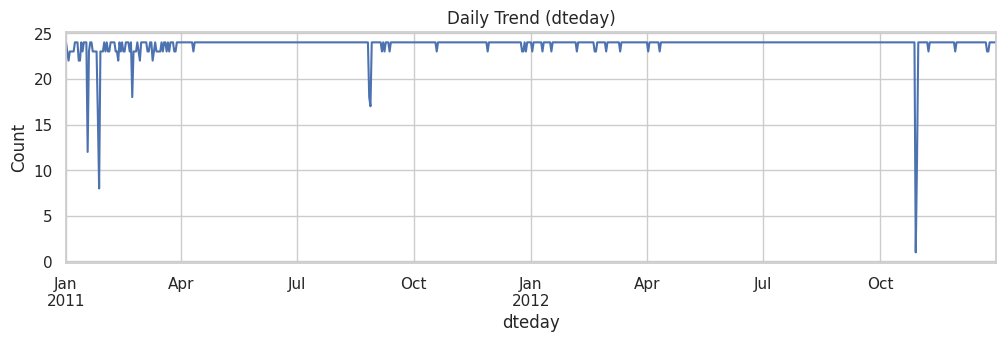


✔ Simple EDA done.


In [7]:
# SIMPLE EDA (clean & minimal)
# Choose dataset
df = merged   # or hour_df / day_df

print("Running simple EDA...\n")

# 1) Descriptive statistics for numeric columns
num_df = df.select_dtypes(include=['int64', 'float64'])
print("📌 Summary statistics:")
display(num_df.describe().T)

import matplotlib.pyplot as plt
import seaborn as sns

# 2) Histograms for first 4 numeric columns (not cluttered)
cols = num_df.columns[:4]

for c in cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[c], bins=25)
    plt.title(f"Histogram: {c}")
    plt.xlabel(c)
    plt.ylabel("Frequency")
    plt.show()

# 3) Time-series daily trend (if date column exists)
date_cols = df.select_dtypes(include=['datetime64[ns]']).columns

if len(date_cols) > 0:
    d = date_cols[0]   # use first date column
    daily = df.set_index(d).resample('D').size()

    plt.figure(figsize=(12,3))
    daily.plot()
    plt.title(f"Daily Trend ({d})")
    plt.ylabel("Count")
    plt.show()
else:
    print("No datetime column found -- skipping time-series plot.")

print("\n✔ Simple EDA done.")
